# Pipeline Usage

In this example we will show how to use Dialogue2Graph via python API.

First of all we need to import the `ModelStorage` and `Pipeline` we will be using.

In [1]:
from dialogue2graph.pipelines.model_storage import ModelStorage
from dialogue2graph.pipelines.d2g_llm.pipeline import Pipeline as D2GLLMPipeline

/home/askatasuna/Документы/DeepPavlov/chatsky-llm-autoconfig/.venv/lib/python3.12/site-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "validate" in "Dialogue" shadows an attribute in parent "BaseModel"
  warnings.warn(
2025-04-01 21:17:00,978 - datasets - INFO - PyTorch version 2.6.0 available.


`ModelStorage` instance is used to store LLM and SentenceTransformer models and use cached variants to avoid multiple instances of the same model being up simultaneously.

Each `Pipeline` has it's own default models, but you can override them by passing the key to the model you've added to the `ModelStorage`

In [2]:
ms = ModelStorage()
ms.add(
    "my_model",
    config={
        "name": "gpt-3.5-turbo"
    },
    model_type="llm",
)

pipe = D2GLLMPipeline(ms, formatting_llm="my_model")

2025-04-01 21:17:01,652 - dialogue2graph.pipelines.model_storage - INFO - Added llm model 'my_model' to storage
2025-04-01 21:17:01,707 - dialogue2graph.pipelines.model_storage - INFO - Added llm model 'd2g_llm_grouping_llm:v1' to storage
2025-04-01 21:17:01,760 - dialogue2graph.pipelines.model_storage - INFO - Added llm model 'd2g_llm_filling_llm:v1' to storage
2025-04-01 21:17:01,762 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: cointegrated/LaBSE-en-ru
2025-04-01 21:17:05,250 - dialogue2graph.pipelines.model_storage - INFO - Added emb model 'd2g_llm_sim_model:v1' to storage


2025-04-01 21:17:10,679 - httpx - INFO - HTTP Request: POST https://api.vsegpt.ru/v1/chat/completions "HTTP/1.1 200 OK"
2025-04-01 21:17:10,721 - chromadb.telemetry.product.posthog - INFO - Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
/home/askatasuna/Документы/DeepPavlov/chatsky-llm-autoconfig/dialogue2graph/utils/vector_stores.py:42: UserWarning: Relevance scores must be between 0 and 1, got [(Document(id='0', metadata={'id': 0}, page_content='hey there! how can i help you today?'), 0.9999999999998331), (Document(id='1', metadata={'id': 1}, page_content='sure! i can help with that. when is your flight, and where are you departing from?'), 0.3425369380032218), (Document(id='3', metadata={'id': 3}, page_content='no worries! feel free to reach out anytime.'), 0.09999855712188555), (Document(id='4', metadata={'id': 4}, page_content="you're welcome! have a fantastic trip!"), 0.012217798441700123), (Document(id='2', metada

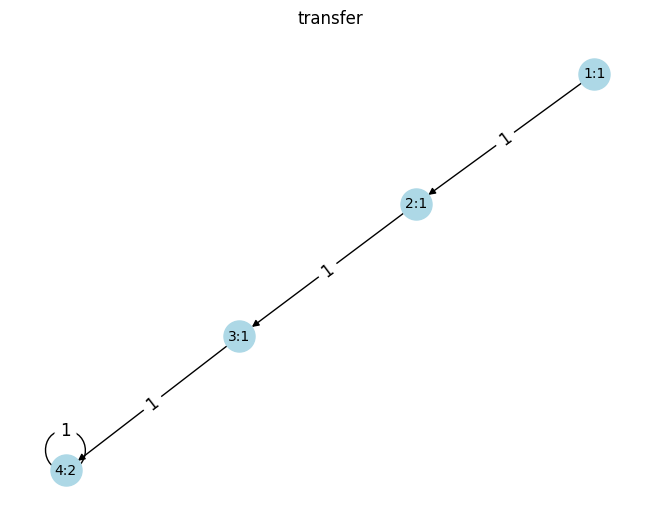

In [3]:
data = [{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'Do you have any other options?', 'participant': 'user'},
   {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
    'participant': 'assistant'},
   {'text': "No, I'll manage on my own.", 'participant': 'user'},
   {'text': 'No worries! Feel free to reach out anytime.',
    'participant': 'assistant'},
   {'text': 'Alright, thanks anyway.', 'participant': 'user'},
   {'text': "You're welcome! Have a fantastic trip!",
    'participant': 'assistant'}]
graph = pipe.invoke(data)
graph.visualise_short("transfer")

Also you can load and dump the models with their configs to the `.yml` files.

In [4]:
ms.save("models_config.yml")

2025-04-01 21:17:11,641 - dialogue2graph.pipelines.model_storage - INFO - Saved 4 models to models_config.yml


In [1]:
!cat models_config.yml

d2g_llm_filling_llm:v1:
  name: o3-mini
  temperature: 1
d2g_llm_grouping_llm:v1:
  name: gpt-4o-latest
  temperature: 0
d2g_llm_sim_model:v1:
  model_kwargs:
    device: cpu
  model_name: cointegrated/LaBSE-en-ru
my_model:
  name: gpt-3.5-turbo
